Isolated Community Evacuation Problem  (ICEP)


This problem can be expressed through two research questions:
During an emergency, how can resources be optimally routed to evacuate the entire community as quickly as possible?

The paper provides two formulations: the first is a deterministic mixed-integer programming formulation (D-ICEP).
The D-ICEP can therefore be used for response purposes and help decision makers and
emergency managers to make decisions on how to effectively allocate available recovery resources to different parts of the disaster
area and how to evacuate the affected population in the fastest possible way.


Before data generation (nodes, resources and arcs), we have to set some parameters:
    

In [1]:
import generateSimpleData
import plotting
import runExpe


num_i = 1               # Number of potential resources for evacuation purpouses
num_a = 2               # Number of areas to be evacuated
num_b = 2               # Number of pickUp points where people are loaded on rescue vehicles
num_c = 2               # Number of shelters where people is dropped off
num_h = 1               # Number of initial locations from where rescue resources depart
num_t = 1               # Number of sink node (to not be changed)
evaDemand = 60          # Number of people per area
num_selfEva = 5         # Number of self evacuees (people that can safe themselfs)
numClas = 1             # Number of classes of rescue resources

Next, we can move on by generating data:

In [2]:
data = generateSimpleData.generateSimpleData(num_i, num_a, num_h, num_b, num_c, num_selfEva, evaDemand, numClas)

So now we can plot our emergency base line situation:
<ul>
    <li>Red cross and green cross are start and sink node respectively </li>
    <li>Dark dotted arcs are just ideal  </li>
    <li>Yellow nodes and yellow arcs are the initial resource location and the trip the resource have to take to reach an evacuation area </li>
    <li>Blue nodes are evacuation areas and red dashed arcs represent population movements to pickUp points </li>
    <li>Green nodes are pick-up points </li>
    <li>Blue arcs represent the roads used by rescuers to reach shelters (red nodes) from pick-up points and back </li>
    <li>Green dotted arcs represents people who can self evacuate the area with their own vehicles </li>
</ul>
     

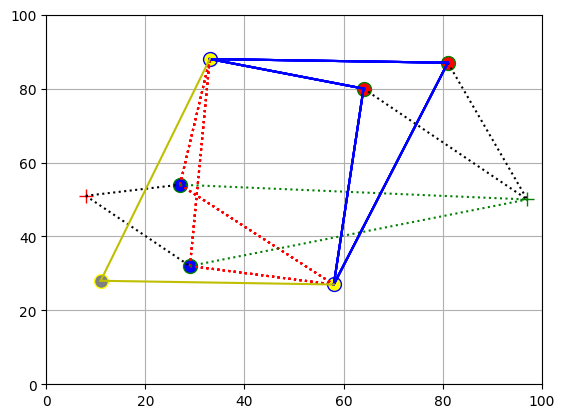

In [3]:
plotting = plotting.Plotting(data)
plotting.plotBase()
plotting.plotResourceArcs()

Now let's run our experiment and check which is the path of the i-th resource at the k-th trip

Set parameter Username
Academic license - for non-commercial use only - expires 2023-09-16
Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 202 rows, 114 columns and 459 nonzeros
Model fingerprint: 0xd64753cc
Variable types: 0 continuous, 114 integer (50 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 6e+01]
Presolve removed 136 rows and 18 columns
Presolve time: 0.00s
Presolved: 66 rows, 96 columns, 273 nonzeros
Variable types: 0 continuous, 96 integer (45 binary)

Root relaxation: objective 1.388826e+02, 57 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  138.88261    0   15          -  138.88261      -     -    0

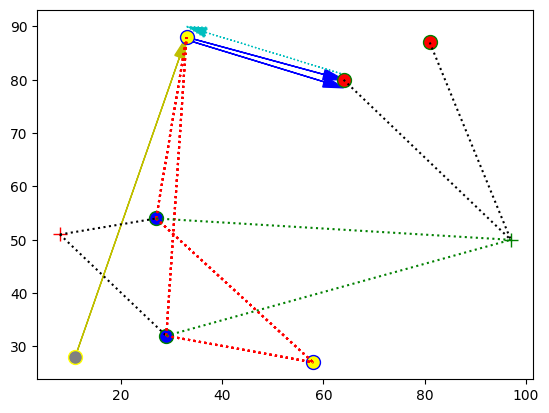

Solution found in  0.04664421081542969 seconds. Total rescue time:  151.0 minutes
Note: for arrow order follow the path from the inital location (yellow arc), then from pick-up to shelter (blue arc), then back (cyan arc), then blue again


In [4]:

status, runtime, objVal, experiment = runExpe.runExpe(data)
vars = experiment.getVars()
i = 0                               # Resource 1 index
k = 0                               # Trip 1 index
objValue = objVal
plotting.plotBase()                 # Plot base nodes and roads
plotting.plotZetaArc(vars, i)       # Plot arcs from initial locations to pickup poiunts
plotting.plotGammaArc(vars, i, k)   # Plot arcs from pickUp to shelters
plotting.plotDeltaArc(vars, i, k)   # Plot arcs from shelters back to pickUp points
plotting.plotGammaArc(vars, i, k+1) # Plot arcs from pickUp to shelters in the succesively trip
plotting.show()

print("Solution found in ", runtime, "seconds. Total rescue time: ", objVal, "minutes")
print("Note: for arrow order follow the path from the inital location (yellow arc), then from pick-up to shelter (blue arc), then back (cyan arc), then blue again")

Now we can try to increase some parameters such as the number of resources, number of evacuation areas and pickup points, and also introduce vehicle type specific compatibility between resources and pick or drop points (Es. a ferry is not compatible with a parking lot).


In [5]:
num_i = 4               # Number of potential resources for evacuation purpouses
num_a = 2               # Number of areas to be evacuated
num_b = 3               # Number of pickUp points where people are loaded on rescue vehicles
num_c = 3               # Number of shelters where people is dropped off
num_h = 2               # Number of initial locations from where rescue resources depart
num_t = 1               # Number of sink node (to not be changed)
evaDemand = 100         # Number of people per area
num_selfEva = 5         # Number of self evacuees (people that can safe themselfs)
numClas = 2             # Number of classes of rescue resources

Then as before, we regenerate data, compute experiment and show results:

In [6]:
data = generateSimpleData.generateSimpleData(num_i, num_a, num_h, num_b, num_c, num_selfEva, evaDemand, numClas)
status, runtime, objVal, experiment = runExpe.runExpe(data)

vars = experiment.getVars()
objValue = objVal


print("Solution found in ", runtime, "seconds. Total rescue time: ", objVal, "minutes")


Gurobi Optimizer version 9.5.2 build v9.5.2rc0 (win64)
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads
Optimize a model with 739 rows, 463 columns and 2603 nonzeros
Model fingerprint: 0x3e22d8fc
Variable types: 0 continuous, 463 integer (240 binary)
Coefficient statistics:
  Matrix range     [1e+00, 4e+01]
  Objective range  [1e+00, 1e+00]
  Bounds range     [1e+00, 1e+00]
  RHS range        [1e+00, 1e+02]
Presolve removed 565 rows and 158 columns
Presolve time: 0.00s
Presolved: 174 rows, 305 columns, 908 nonzeros
Variable types: 0 continuous, 305 integer (153 binary)

Root relaxation: objective 2.333000e+02, 218 iterations, 0.00 seconds (0.00 work units)

    Nodes    |    Current Node    |     Objective Bounds      |     Work
 Expl Unexpl |  Obj  Depth IntInf | Incumbent    BestBd   Gap | It/Node Time

     0     0  233.30000    0   15          -  233.30000      -     -    0s
     0     0  249.33333    0    3          -  249.33333      -     -    0s
H    0